# Chapter 14 - Models of Choice Response Time

##### A quick reminder of Random Walk Models
see Random Walk Refresher notebook (python 3)

#### What are we trying to do
A very common way of modeling decision making in humans and animals is to consider the gradual accumulation of information as the selection process that leads to a decision or movement, etc...

There are often speed accuracy tradeoffs in decision making. These sets of models help us resolve the SA tradeoff while also being in principle falsifiable. This is important, because for a long time, we researchers have struggled with resolving the S-A tradeoff.

We can model this in the random walk type of decision as updating our decision "evidence" on every cycle until we reach some sort of threshold or run out of time.

- Random walks are more "historical" now than anything - they can help us understand what modern models are doing, but we are going to focus on the Ratcliff diffusion model and the Linear Ballistic Accumulator model



## The Ratcliff Diffusion Model - a noisy evidence accumulator
<img src='driftDiffusionImage.jpg'>

Let's break that down quickly.

There are 3 main parameters to start with that we are familiar with from the random walk models:<br>
    1) Non-Decision time: (T$_{er}$) 
    <br>
    2) Decision Starting Point (bias): Z
    <br>
    3) Decision Drift Rate: $\epsilon $ or V
    
There are more parameters that generally govern the behavior of the model, some of which we've already met: <br>
    4) Std of the drift rate: $\eta $ or S$_v$ <br>
    5) Boundary Separation: $\alpha $ <br>
    6) Std of decision starting point: S$_z$ <br>
    7) Noise in the environment: s
    8) Std of the non-decision time: S$_{T0}$
    
Given some set of parameters, we collect info from a noisy environment until the accumulated evidence reaches some threshold and then we make the decision.

$\textbf{Given these parameters the diffusion modelcan account for standard behavorial aspects} $<br>
$\textbf{like accuracy, mean RTs for errors and correct responses, and the shape of both types of response distributions.} $

Conceptually, the Ratcliff diffusion model is quite similar to the random walk - however estimating the params is actually quite difficuly and computationally complex.

Luckily for us, others have created great toolboxes for doing so already. Hooray them!
- In particular, we are going to use rtdists

#### QuantileProbability Plots

My understand of these plots is: Each line connects a quantile of data: <br>
(.1, .3, .5, .7, .9) represented here <br>

The dots are "pairs" of correct/incorrect for each of 6 conditions that differ in difficulty.

So now we can use this plot to represent different distribution of RTs and Accs across conditions and quantiles

<img src="qpp_ratcliff_2008.png">


In [2]:
library(rtdists)

Warning message:
“package ‘rtdists’ was built under R version 3.4.3”

In [6]:
#In this function, we are going to create a function that takes in some params for RT-type
#data and will output that data plus a quantile plot for that data

#Create the qpf function
qpf <- function(a,v,t0,sz,sv,st0) {
  d  <- 0       #no preference for either boundary   
  z  <- 0.5*a   #starting point in the middle        
  #get maximum response probabilities
  #with infinite RT
  maxpUp <- pdiffusion(rep(Inf, length(v)), response="upper", 
                       a=a,v=v,t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)      
  maxpLr <- pdiffusion(rep(Inf, length(v)), response="lower", 
                       a=a,v=v,t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)      
  
  #now obtain RTs in ms for quantiles and plot
  qtiles <- seq(from=.1, to=.9, by=.2)
  lmp <- length(maxpUp)
  forqpfplot <- matrix(0,length(qtiles),lmp*2)
  for (i in c(1:lmp)) { 
    forqpfplot[,i]     <- qdiffusion(qtiles*maxpLr[lmp+1-i],
                                      response="lower",maxt=10,
                                        a=a,v=v[lmp+1-i],t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)*1000
    forqpfplot[,lmp+i] <- qdiffusion(qtiles*maxpUp[i], 
                                     response="upper",maxt=10,
                                     a=a,v=v[i],t0=t0,d=d,z=z,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)*1000
  }                     
  plot(0,0,type="n",las=1,
       ylim=c(0,max(forqpfplot,na.rm=TRUE)+200),xlim=c(0,1),
       xlab="Response proportion",
       ylab="RT quantile (ms)")
  apply(forqpfplot,1, FUN=function(x) lines(c(rev(maxpLr),maxpUp),x) )
  apply(forqpfplot,1, FUN=function(x) points(c(rev(maxpLr),maxpUp),x,pch=4) )
  text(.7,max(forqpfplot,na.rm=TRUE)+100, 
       substitute(paste("a=",anum,"; ",
                        s[z],"=", 
                        sznum,"; ",
                        eta,"=",svnum,"; ",
                        s[t],"=",stnum),
                        list(anum=a,sznum=sz,svnum=sv,stnum=st0)))
} 

Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.00743534279065785.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0223060283719735.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0104418970731532.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0145512524563346.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0251282128081405.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0249060023350655.
Increase/decrease interval or obtain for different response.”Warning message:
“Can

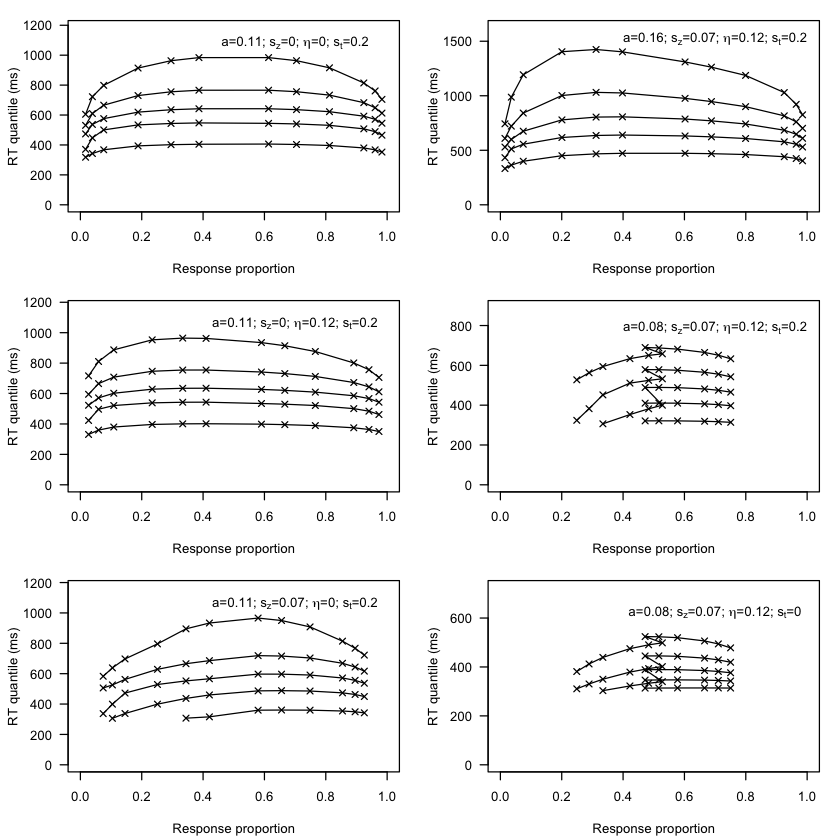

In [7]:
v = c(.042,.079,.133,.227,.291,.369)

par(mfcol=c(3,2),mar = c(4, 4, 1, 1) + 0.3)
qpf(a=.11, v, t0=0.3, sz=0,    sv=0.0,  st0=0.2)  
qpf(a=.11, v, t0=0.3, sz=0,    sv=0.12, st0=0.2)
qpf(a=.11, v, t0=0.3, sz=0.07, sv=0.0,  st0=0.2)
qpf(a=.16, v, t0=0.3, sz=0.07, sv=0.12, st0=0.2)
qpf(a=.08, v, t0=0.3, sz=0.07, sv=0.12, st0=0.2)
qpf(a=.08, v, t0=0.3, sz=0.07, sv=0.12, st0=0) 

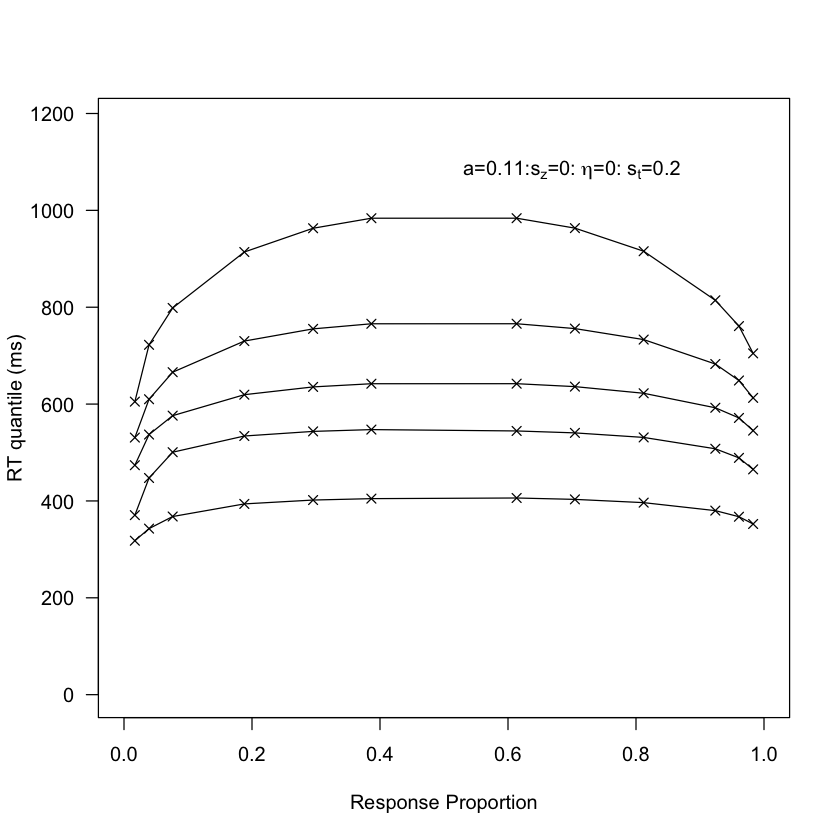

In [11]:
#Let's create this ourselves and then talk about it
#library(rtdists)

#Parameters from the ratcliff & McKoon 2008 paper
#drift rates
v = c(.042,.079,.133,.227,.291,.369)

#Now plot various param values
#x11()
#par(mfcol=c(3,2),mar=c(4,4,1,1)+0.3)
qpf(a=.11,v,t0=0.3,sz=0,sv=0.0,st0=0.2)
#qpf(a=.11,v,t0=0.3,sz=0,sv=0.12,st0=0.2)
#qpf(a=.11,v,t0=0.3,sz=0.07,sv=0.0,st0=0.2)
#qpf(a=.16,v,t0=0.3,sz=0.07,sv=0.12,st0=0.2)
#qpf(a=.08,v,t0=0.3,sz=0.07,sv=0.12,st0=0.2)
#qpf(a=.08,v,t0=0.3,sz=0.07,sv=0.12,st0=0)

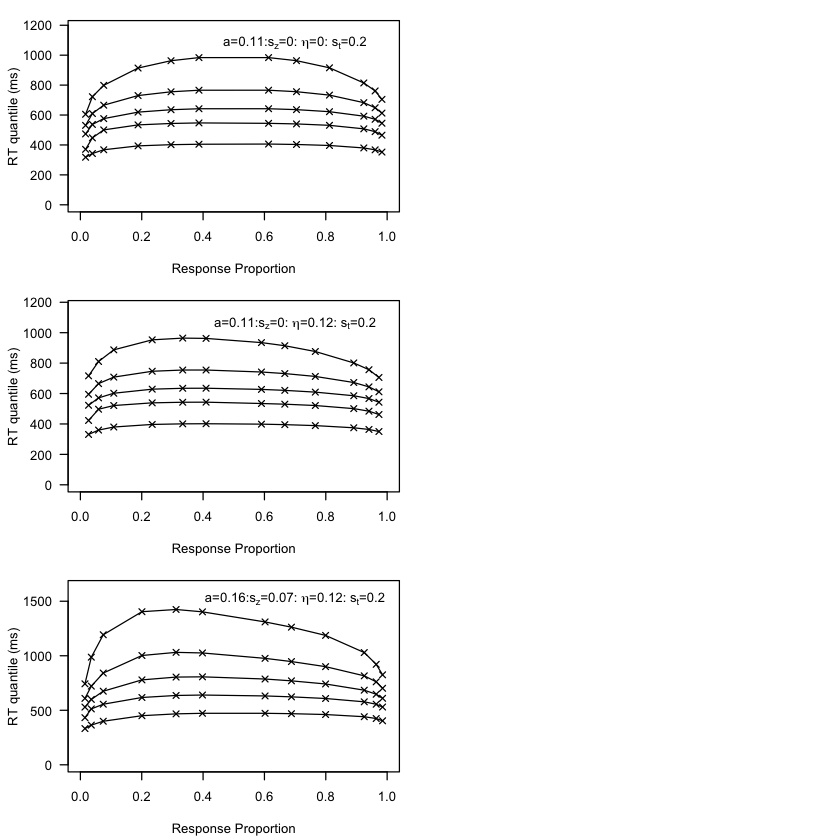

In [12]:
#Parameters from the ratcliff & McKoon 2008 paper
#drift rates
v = c(.042,.079,.133,.227,.291,.369)

#Now plot various param values
#x11()
par(mfcol=c(3,2),mar=c(4,4,1,1)+0.3)
qpf(a=.11,v,t0=0.3,sz=0,sv=0.0,st0=0.2)
qpf(a=.11,v,t0=0.3,sz=0,sv=0.12,st0=0.2)
#qpf(a=.11,v,t0=0.3,sz=0.07,sv=0.0,st0=0.2)
qpf(a=.16,v,t0=0.3,sz=0.07,sv=0.12,st0=0.2)
#qpf(a=.08,v,t0=0.3,sz=0.07,sv=0.12,st0=0.2)
#qpf(a=.08,v,t0=0.3,sz=0.07,sv=0.12,st0=0)

#### Intermission
Awesome, so now that we've generated some fake data and shown what those distributions look like, let's learn how to fit a drift model to a dataset.

First, we're going to create a diffusionloglik function that will be minimized by a fit function.

In [13]:
#Function returns neg log likelihood of predictions
#This works like any log likelihood calculator, except that we have added the tryCatch workaround
diffusionloglik=function(pars,rt,response){
    likelihoods = tryCatch(ddiffusion(rt,
                                     response=response,
                                     a=pars["a"],
                                     v=pars["v"],
                                     t0=pars["t0"],
                                     z=0.5*pars["a"],
                                     sz=pars["sz"],
                                     st0=pars["st0"],
                                     sv=pars["sv"],s=0.1,precision=1),
                           error=function(e) 0)
    if (any(likelihoods==0)) return(1e6)
    return(-sum(log(likelihoods)))
}

In [18]:
#library(rtdists)
#here, we are just going to generate a bunch of data where we have set the params.

genParms=c(.1,.2,.5,.05,.2,.05)
names(genParms)=c("a","v","t0","sz","st0","sv")
rts=rdiffusion(500, a=genParms["a"],
              v=genParms["v"],
              t0=genParms["t0"],
              z=0.5*genParms["a"],
              d=0,
              sz=genParms["sz"],
              sv=genParms["sv"],
              st0=genParms["st0"],
              s=0.1)

#Generate starting values for these params (drawing from random dist with certain means and std)
sparms=c(runif(1,0.01,0.4),
        runif(1,0.01,0.5),
        0.3,
        runif(1,0.02,0.08),
        runif(1,.1,.3),
        runif(1,0,0.1))
names(sparms)=c("a","v","t0","sz","st0","sv")

In [19]:
#Let's take a look at that data we've generated in an intuitive way
str(rts)
head(rts)
prop.table(table(rts$response))

'data.frame':	500 obs. of  2 variables:
 $ rt      : num  0.766 0.743 0.644 0.688 0.708 ...
 $ response: Factor w/ 2 levels "lower","upper": 2 1 2 2 2 2 2 2 2 2 ...


rt,response
0.7655309,upper
0.7425933,lower
0.6435649,upper
0.6877087,upper
0.7081830,upper
0.7405484,upper



lower upper 
0.114 0.886 

In [1]:
#Now fit that
fit2rts = optim(sparms, diffusionloglik,gr=NULL,rt=rts$rt,response=rts$response)
round(fit2rts$par,3)

ERROR: Error in optim(sparms, diffusionloglik, gr = NULL, rt = rts$rt, response = rts$response): object 'sparms' not found


#So recall that we started with the params: <br>
    a =  .1 <br>
    v =  .20 <br>
    t0=  .50 <br>
    sz=  .05 <br>
    st0= .20 <br>
    sv = .05
    
It will vary a bit each time due to random chance, but we recover original params pretty well

##### Example Time #2
This time, we are going to generate data that varies across 6 different drift rates, but is the same across ther other params

In [22]:
#First we generate a bunch of data given specific params
v = c(.042, .079,.133,.277,.291,.369)
a = .11
z = 0.5*a
d = 0
sz = 0
t0 = 0.3
st0 = 0.2
sv = 0
npc=1000 #n per condition
nv=length(v) #Number of conditions
set.seed(8) #Random number seed setting for reproducibility
movedata<-NULL

qtiles=seq(from=.1, to=.9, by=.2)
forqpfplot=matrix(0,length(qtiles),nv*2)
pLow=pUp=rep(0,nv)
for (i in c(1:nv)){
    rt41cond=rdiffusion(npc,a=a,v=v[i],t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=.1,precision=3)
    movedata=rbind(movedata,rt41cond)
    
    pLow[i]=sum(rt41cond$response=="lower")/npc
    pUp[i]=sum(rt41cond$response=="upper")/npc
    forqpfplot[,nv+1-i]=quantile(rt41cond$rt[rt41cond$response=="lower"],
                                qtiles)*1000
    forqpfplot[,i+nv]=quantile(rt41cond$rt[rt41cond$response=="upper"],
                              qtiles)*1000
}

head(rt41cond,30)
forqpfplot

rt,response
0.4875191,upper
0.5272241,upper
0.6413300,upper
0.3922196,upper
0.5128037,upper
0.4949362,upper
0.6383150,upper
0.5000735,upper
0.5719303,upper
0.5632258,upper


422.4743,422.1193,497.6735,433.5142,450.0911,452.6469,458.1062,459.5937,455.9406,424.5281,429.9698,421.3063
493.3948,489.8473,532.4142,518.8016,535.6188,542.8537,555.9987,545.7614,538.1224,491.0456,495.9842,478.4135
506.9845,536.5138,586.4926,600.5870,603.3736,636.8826,634.6789,632.4785,608.7823,549.1557,554.5297,529.6364
555.9409,585.6900,616.4634,691.8816,721.0825,779.1443,767.0599,738.8346,712.3879,625.6164,620.8254,583.7256
660.7280,711.8445,757.3868,865.0772,955.7494,1009.9968,1003.6421,1000.4518,945.5834,776.4205,758.4541,693.6308


NULL

NULL

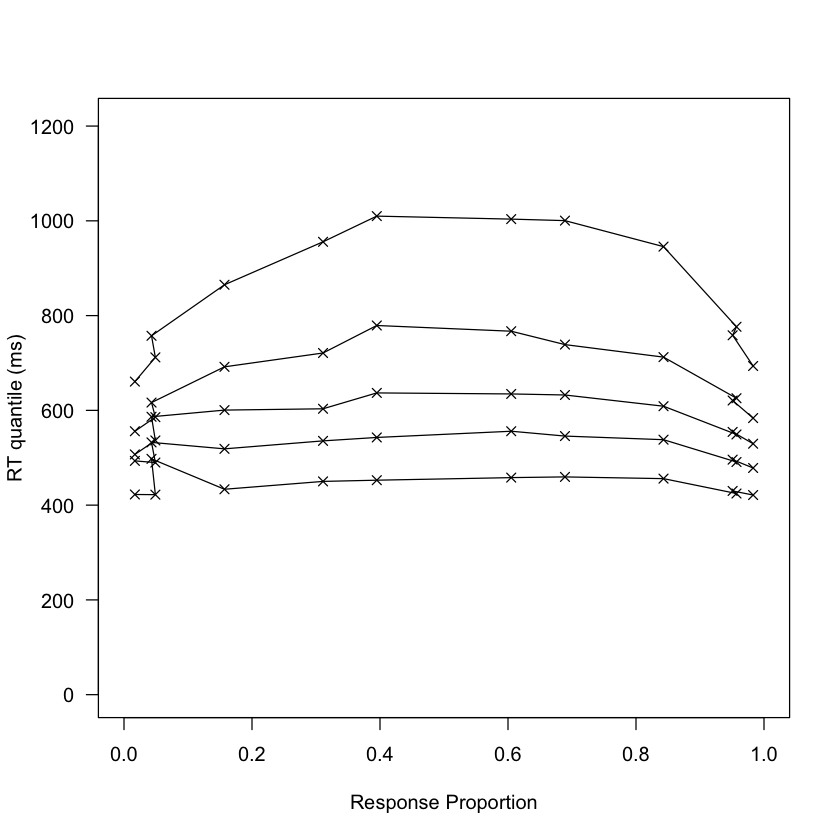

In [23]:
#Plot the synthetic data
plot(0,0,type="n",las=1,
    ylim=c(0,max(forqpfplot)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(forqpfplot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpfplot,1,FUN=function(x) lines(c(rev(pLow),pUp),x) )
    
#So below you should see the 5 quantile lines, and the 6 sets of points per line to indicate
#what the data look like in terms of the RT-Acc tradeoff in each condition.

Alright, great! We've generated some systematic fake data. Now let's fit our diffusion model to it to see if we can recover our original params

In [24]:
#This version of our likelihood fitting function allows for a different drift rate for each
#chunk of data. Notice that we are just separating the data by location in the array here,
#and not doing any fancier parsing of the data set.

#function for neg log likelihood
diffusionloglik2=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    for (i in c(1:length(ptrs))){
        likelihoods=c(likelihoods,tryCatch(ddiffusion(rt[((i-1)*eachn+1):(i*eachn)],
                                                     response=response[((i-1)*eachn+1):(i*eachn)],
                                                     a=pars["a"],
                                                     v=pars[ptrs[i]],
                                                     t0=pars["t0"],
                                                     z=0.5*pars["a"],
                                                     d=0,
                                                     sz=pars["sz"],
                                                     st0=pars["st0"],
                                                     sv=pars["sv"],
                                                     s=.1,precision=3),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))    
}
                                           
#Generate starting values for params - here we are separately fitting each of the drift rates
sparms=c(runif(1,0.1,0.2),
        v+rnorm(length(v),0,.05),
        0.3,
        0.05,
        runif(1,0,.2),
        0.1)
names(sparms)=c("a",paste("v",1:nv,sep=""),"t0","sz","st0","sv")

In [25]:
#Now we can fit the model to estimate those params
#This takes a bit, so we're not going to do it now.
fit2rts=optim(sparms, diffusionloglik2, gr=NULL,rt=movedata$rt,response=movedata$response)
round(fit2rts$par,3)

a    v1    v2    v3    v4    v5    v6    t0    sz   st0    sv 
0.116 0.043 0.078 0.171 0.322 0.334 0.438 0.314 0.058 0.196 0.077

In [ ]:
#So it does a decent job of recovering our randomly generated params. Let's explore what's up.
v = c(.042, .079,.133,.277,.291,.369)
a = .11
d = 0
sz = 0
t0 = 0.3
st0 = 0.2
sv = 0

NULL

NULL

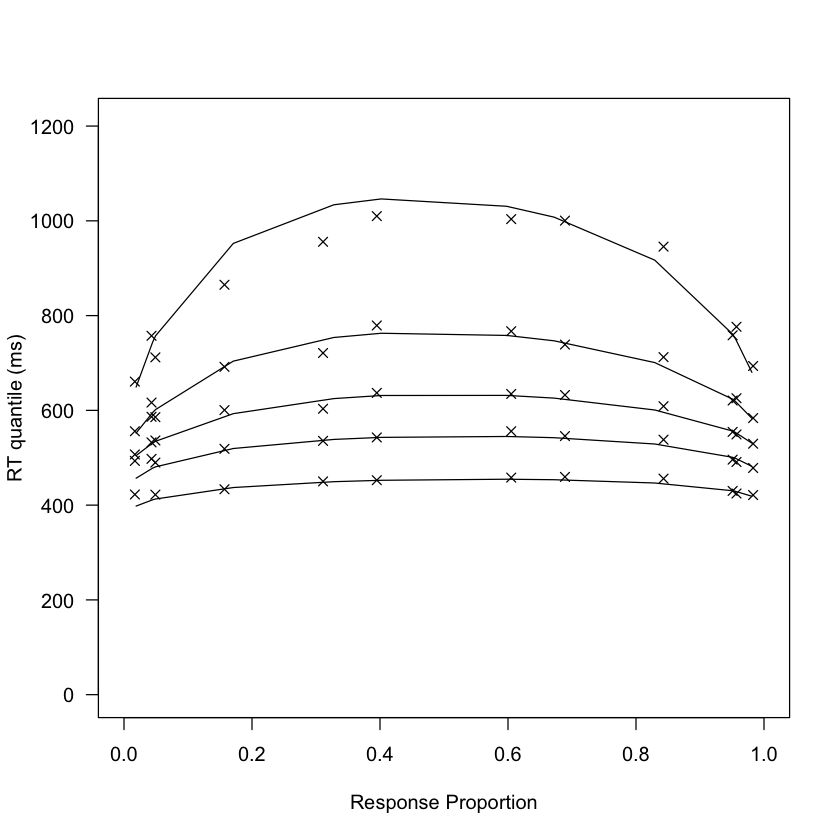

In [26]:
#Now obtrain predictions from model for plotting
#First maximum proportion
vfitted=fit2rts$par[paste("v",1:nv,sep="")]
maxUp=pdiffusion(rep(Inf,length(vfitted)),response="upper",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=fit2rts$par["t0"],
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)
maxLr=pdiffusion(rep(Inf,length(vfitted)),response="lower",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=fit2rts$par["t0"],
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)

#Now the RT quantiles
forqpf=matrix(0,length(qtiles),nv*2)
for (i in c(1:nv)){
    forqpf[,i] = qdiffusion(qtiles*maxLr[nv+1-i],
                     response="lower",
                      a=fit2rts$par["a"],
                      v=vfitted[nv+1-i],
                      t0=fit2rts$par["t0"],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
    forqpf[,i+nv] = qdiffusion(qtiles*maxUp[i],
                     response="upper",
                      a=fit2rts$par["a"],
                      v=vfitted[i],
                      t0=fit2rts$par["t0"],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
}

plot(0,0,type="n",las=1,
    ylim=c(0,max(forqpfplot)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(forqpfplot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpf,1,FUN=function(x) lines(c(rev(maxLr),maxUp),x))

#Cool, so now we've run our model, extracted our best fit params, and seen that the data generated by those params fits our data reasonably well.

### Last thoughts on Ratcliff Diffusion Models
#### Interprability
Interpretting the model.  We can use this to get at different aspects of speed accuracy trade offs during task performance between individuals or groups etc...

<img src="sampDat.png">

We can look at this data and try to quantify some sort of % accuracy improvement for ms spent $\textbf{OR}$ we could look at the more explanatory parameter estimates from these models.

We can now make certain interpretations about these individuals based on drift rate, non decision time, and criterion params

#### Falsifiability
The diffusion model cannot fit all data sets
Only those that are: <br>
1) positively skewed <br>
2) skewed by the right amount

So the model is falsifiable, which is good because in normal RT experiments, the data fits those two requirements.

#### Ballistic Accumulator Models
These models discard the idea of within-choice noise
    - Think about the "jagged path" our random walk model takes
    - These models don't wiggle -> they are ballistic
<br>
<br>
<img src='compImage.png'>
    
##### Linear Ballistic Model
Eviddence is accumulated linearly and independently for all responses

Word example:
    Presented with "KAAL" and must determine word or nonword
    LBMs assume that evidence for both simultaneously collects, but once boundary crossed for one, the decision is made and other stops accumulating.
    
Params: <br>
    1) Evidence accumulation starts at random point between [0,A] <br>
    2) Drift rate is sampled from a normal distribution with std dev = s and a mean that can vary between stimuli types <br>
     There are separate mean rates (V$_w$ and V$_{NW}$) <br>
    3) Drift rate is sampled according to whichever is the correct response <br>
    4) Incorrect trials are set to 1-CR
    5) Decision boundary: $\beta $
    
Calculating time to reach a decision is distance $\beta$-A / driftRate
    - and fastest time wins the decision race!
    
This model can handle both fast and slow errors as can be understood from a speed/accuracy tradeoff experimental example:
    1) In speed-emphasis design: $\beta$ will be close to A, so decisions randomly selected from top of [0,A] will be equally correct and incorrect, but starting points lower down will be mostly correct.
    2) For accuracy-emphasis, the distance from A to $\beta$ will matter less, so it will only be trials where the correct drift rate is randomly sampled low that there will be incorrect responses. Leading to a few slow errors.

In [2]:
#Enough talk, let's do this. First let's get a clean workspace.
rm(list=ls())

#Generate some RT data from an LBA
v=c(.55,.65,.8,1.05)
A=.7
b=.71
t0=.35
sv=.25
st0=0
npc=1000
nv=length(v)

movedata=NULL

qtiles=seq(from=.1, to=.9, by=.2)
forqf=matrix(0,length(qtiles),nv*2)
pLow=pUp=rep(0,nv)
for (i in c(1:length(v))){
    rt41cond=rLBA(npc,A,b,t0,
                 mean_v=c(v[i],1-v[i]),sd_v=c(sv,sv))
    movedata=rbind(movedata,rt41cond)
    
    pLow[i]=sum(rt41cond$response==2)/npc
    pUp[i]=sum(rt41cond$response==1)/npc
    
    forqf[,nv+1-i]=quantile(rt41cond$rt[rt41cond$response==2],qtiles)*1000
    forqf[,i+nv]=quantile(rt41cond$rt[rt41cond$response==1],qtiles)*1000
    
}

#plot the thing
plot(0,0,type="n",las=1,
    ylim=c(0,max(forqf)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(forqf,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )

ERROR: Error in rLBA(npc, A, b, t0, mean_v = c(v[i], 1 - v[i]), sd_v = c(sv, : could not find function "rLBA"


In [28]:
#Alright, now let's fit the data we jsut generated.
LBAloglik=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    
    for(i in c(1:length(ptrs))){
        likelihoods=c(likelihoods,tryCatch(dLBA(rt[((i-1)*eachn+1):(i*eachn)],
                                               response=response[((i-1)*eachn+1):(i*eachn)],
                                               A=pars["A"],
                                               b=pars["b"],
                                               t0=pars["t0"],
                                               mean_v=c(pars[ptrs[i]],
                                                       1-pars[ptrs[i]]),
                                               sd_v=c(pars["sv"],pars["sv"])),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))
}
                                           
#Generate starting values for params
sparms=c(.7,.71,.35,v+rnorm(1,0,0.5),.25)
names(sparms)=c("A","b","t0",paste("v",1:nv,sep=""),"sv")

In [29]:
#Now we can estimate the params
fit2rts=optim(sparms,LBAloglik,gr=NULL,rt=movedata$rt, response=movedata$response)
round(fit2rts$par,3)

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

A     b    t0    v1    v2    v3    v4    sv 
0.742 0.751 0.352 0.544 0.676 0.865 1.175 0.277

In [63]:
#Our original params
v=c(.55,.65,.8,1.05)
A=.7
b=.71
t0=.35
sv=.25
st0=0

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.


NULL

NULL

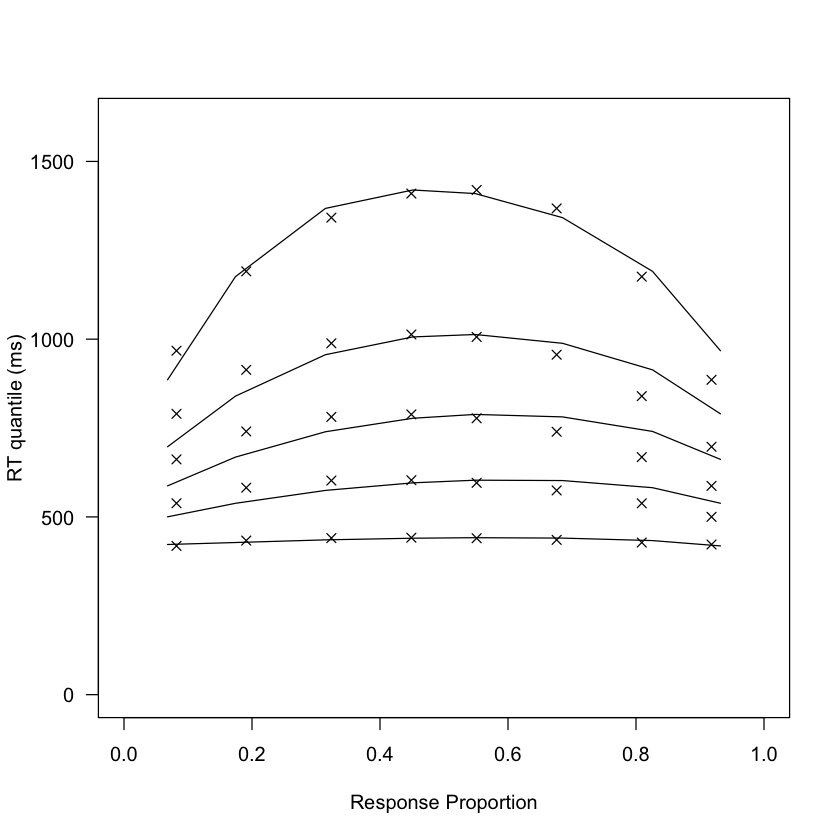

In [30]:
#Finally, we can plot these predictions to make sure that they 
#really fit the distribution of our data
vfitted=fit2rts$par[paste("v",1:nv,sep="")]
maxUp=vapply(vfitted, FUN=function(x) pLBA(100,response=2,
                                          A=fit2rts$par["A"],
                                          b=fit2rts$par["b"],
                                          t0=fit2rts$par["t0"],
                                          mean_v=c(x,1-x),
                                          sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"])),
             numeric(1))
maxLr=1-maxUp

#Now the RT quantiles
forqpf2=matrix(0,length(qtiles),nv*2)
for (i in c(1:nv)){
    forqpf2[,i] = qLBA(qtiles*maxLr[nv+1-i],
                     response=1,
                      A=fit2rts$par["A"],
                      b=fit2rts$par["b"],
                      t0=fit2rts$par["t0"],
                      mean_v=c(vfitted[nv+1-i],1-vfitted[nv+1-i]),
                       sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"]))*1000
    forqpf2[,i+nv] = qLBA(qtiles*maxUp[i],
                     response=2,
                      A=fit2rts$par["A"],
                      b=fit2rts$par["b"],
                      t0=fit2rts$par["t0"],
                      mean_v=c(vfitted[i],1-vfitted[i]),
                       sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"]))*1000
}

plot(0,0,type="n",las=1,
    ylim=c(0,max(forqf)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(forqpf2,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpf2,1,FUN=function(x) lines(c(rev(maxLr),maxUp),x))